In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import seaborn as sns
from shapely.geometry import LineString

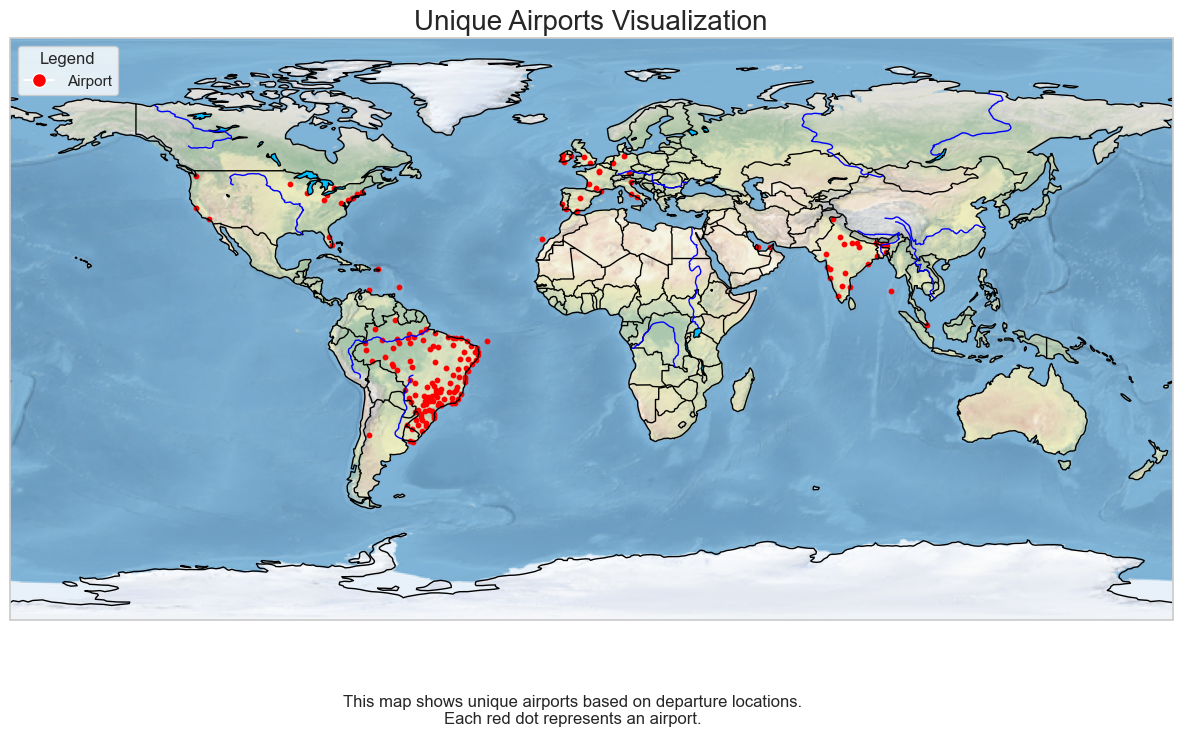

In [13]:
# read data from the Parquet file
data = pd.read_parquet('../data/data_parquet/processed_data_combined.parquet')

# extract unique airports
unique_airports = data[['departure_city', 'departure_country', 'departure_lat', 'departure_lon']].drop_duplicates()

# create a GeoDataFrame
gdf = gpd.GeoDataFrame(unique_airports, 
                       geometry=gpd.points_from_xy(unique_airports.departure_lon, unique_airports.departure_lat))

# filter out empty points
gdf = gdf[~gdf.geometry.is_empty]

# create the map
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()

# add water bodies and land masses
ax.stock_img()  # use standard background image
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='coral')
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='skyblue')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='deepskyblue')
ax.add_feature(cfeature.RIVERS, edgecolor='blue')

# add airports (only points, no labels)
ax.scatter(gdf.geometry.x, gdf.geometry.y, color='red', s=10, transform=ccrs.PlateCarree())

# add title and description
plt.title('Unique Airports Visualization', fontsize=20)
plt.figtext(0.5, 0.1, 'This map shows unique airports based on departure locations.\n'
                      'Each red dot represents an airport.', 
            ha='center', fontsize=12)

# add legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Airport', markerfacecolor='red', markersize=10)]
ax.legend(handles=legend_elements, loc='upper left', title='Legend')

# save the map
plt.savefig('unique_airports_map_colored_with_title.pdf', format='pdf')
plt.show()


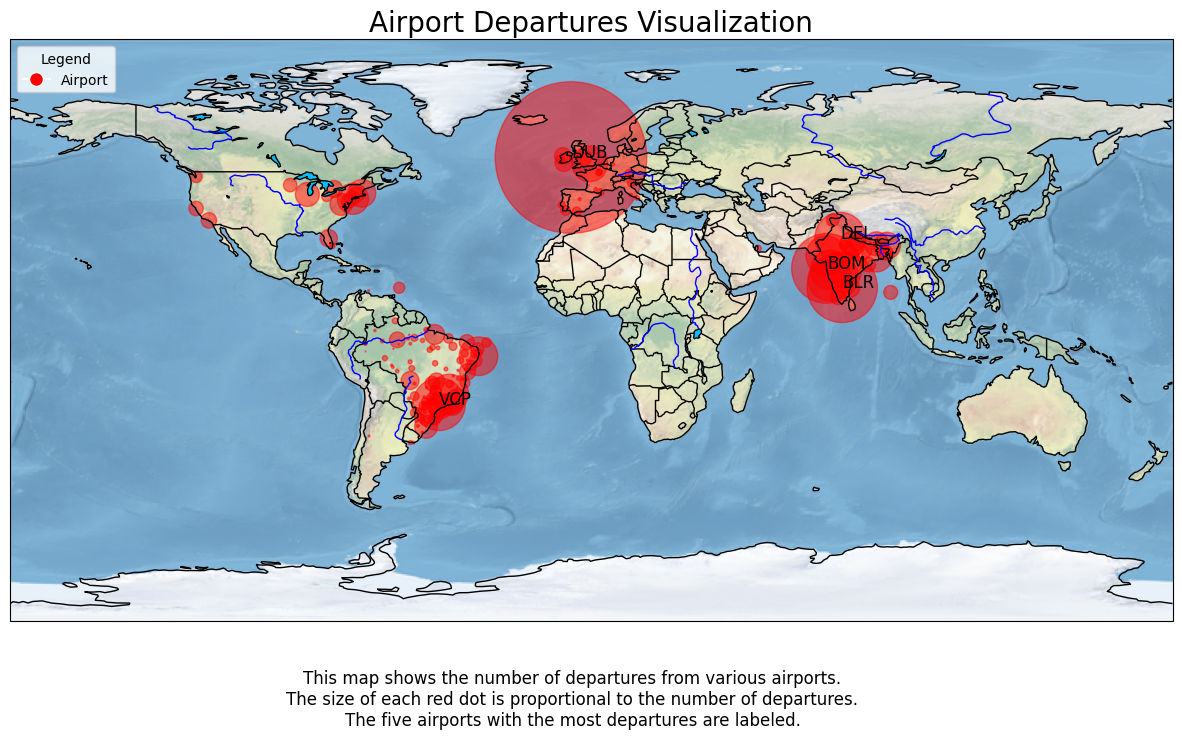

In [5]:
# data
df = pd.read_csv('../data/data_visualization/count_of_departures_by_airport.csv')

# create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, 
                       geometry=gpd.points_from_xy(df.departure_lon, df.departure_lat))

# filter out empty points
gdf = gdf[~gdf.geometry.is_empty]

# find airports with the most departures
top5_airports = gdf.nlargest(5, 'count')

# create the map
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()

# add water bodies and land masses
ax.stock_img()  # use standard background image
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='coral')
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='skyblue')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='deepskyblue')
ax.add_feature(cfeature.RIVERS, edgecolor='blue')

# add airports (scale points based on the number of departures)
sc = ax.scatter(gdf.geometry.x, gdf.geometry.y, color='red', s=gdf['count']*0.1, transform=ccrs.PlateCarree(), alpha=0.5)

# add labels for the five airports with the most departures
for _, row in top5_airports.iterrows():
    ax.text(row.geometry.x + 0.1, row.geometry.y, f"{row['departure_airport']}", fontsize=12, transform=ccrs.PlateCarree())

# add title and description
plt.title('Airport Departures Visualization', fontsize=20)
plt.figtext(0.5, 0.1, 'This map shows the number of departures from various airports.\n'
                      'The size of each red dot is proportional to the number of departures.\n'
                      'The five airports with the most departures are labeled.', 
            ha='center', fontsize=12)

# add legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Airport', markerfacecolor='red', markersize=10)]
ax.legend(handles=legend_elements, loc='upper left', title='Legend')

# save the map
plt.savefig('top5_airports_map_scaled_with_title.pdf', format='pdf')
plt.show()


/var/folders/vm/vj250x0s5q9bj_4nnx_z8mcc0000gn/T/ipykernel_54234/3230465976.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='count', y='departure_airport', data=df_sorted, palette='viridis')


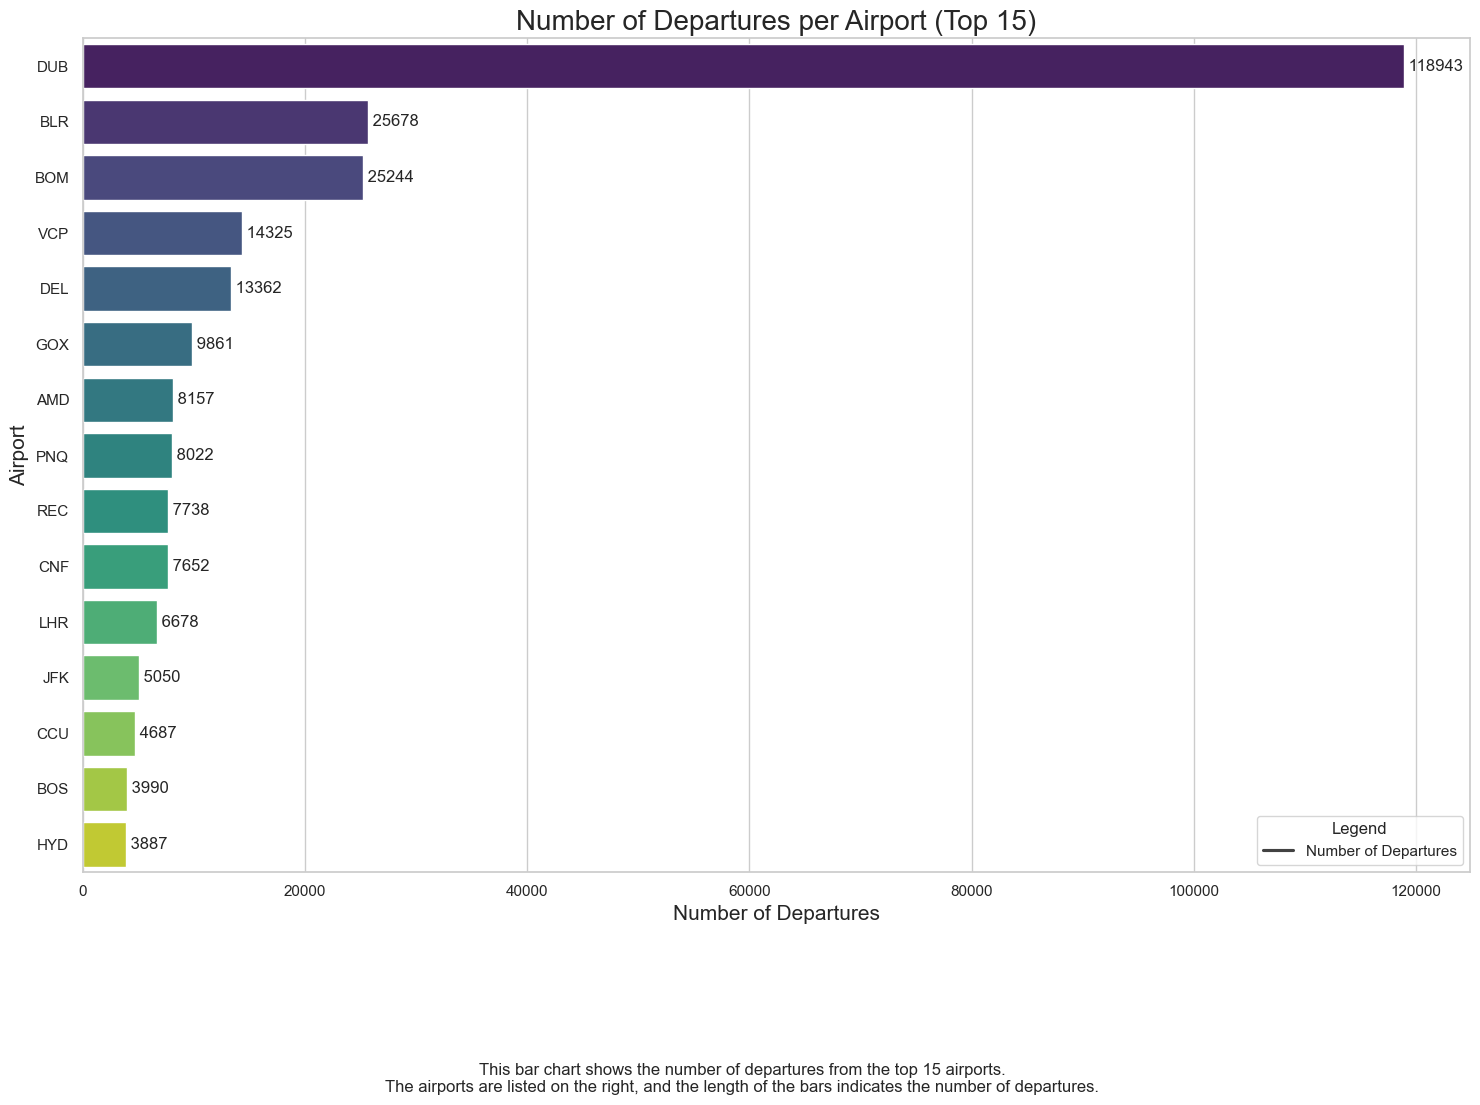

In [4]:
# sort data by count and select top 15 airports
df_sorted = df.sort_values(by='count', ascending=False).head(15)

# create the plot
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")
barplot = sns.barplot(x='count', y='departure_airport', data=df_sorted, palette='viridis')

# add title and labels
plt.title('Number of Departures per Airport (Top 15)', fontsize=20)
plt.xlabel('Number of Departures', fontsize=15)
plt.ylabel('Airport', fontsize=15)

# add number of departures next to the bars
for index, value in enumerate(df_sorted['count']):
    plt.text(value, index, f' {value}', va='center', fontsize=12)

# add description below the plot
plt.figtext(0.5, -0.1, 'This bar chart shows the number of departures from the top 15 airports.\n'
                       'The airports are listed on the right, and the length of the bars indicates the number of departures.', 
            ha='center', fontsize=12)

# add legend
plt.legend(title='Legend', labels=['Number of Departures'])

# adjust layout to make space for the description
plt.tight_layout(rect=[0, 0.05, 1, 1])

# save the plot
plt.savefig('top15_departures_per_airport_bar_chart_with_numbers.pdf', format='pdf')
plt.show()


/var/folders/vm/vj250x0s5q9bj_4nnx_z8mcc0000gn/T/ipykernel_54234/787158907.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='count', y='route', data=top_routes, palette='viridis')


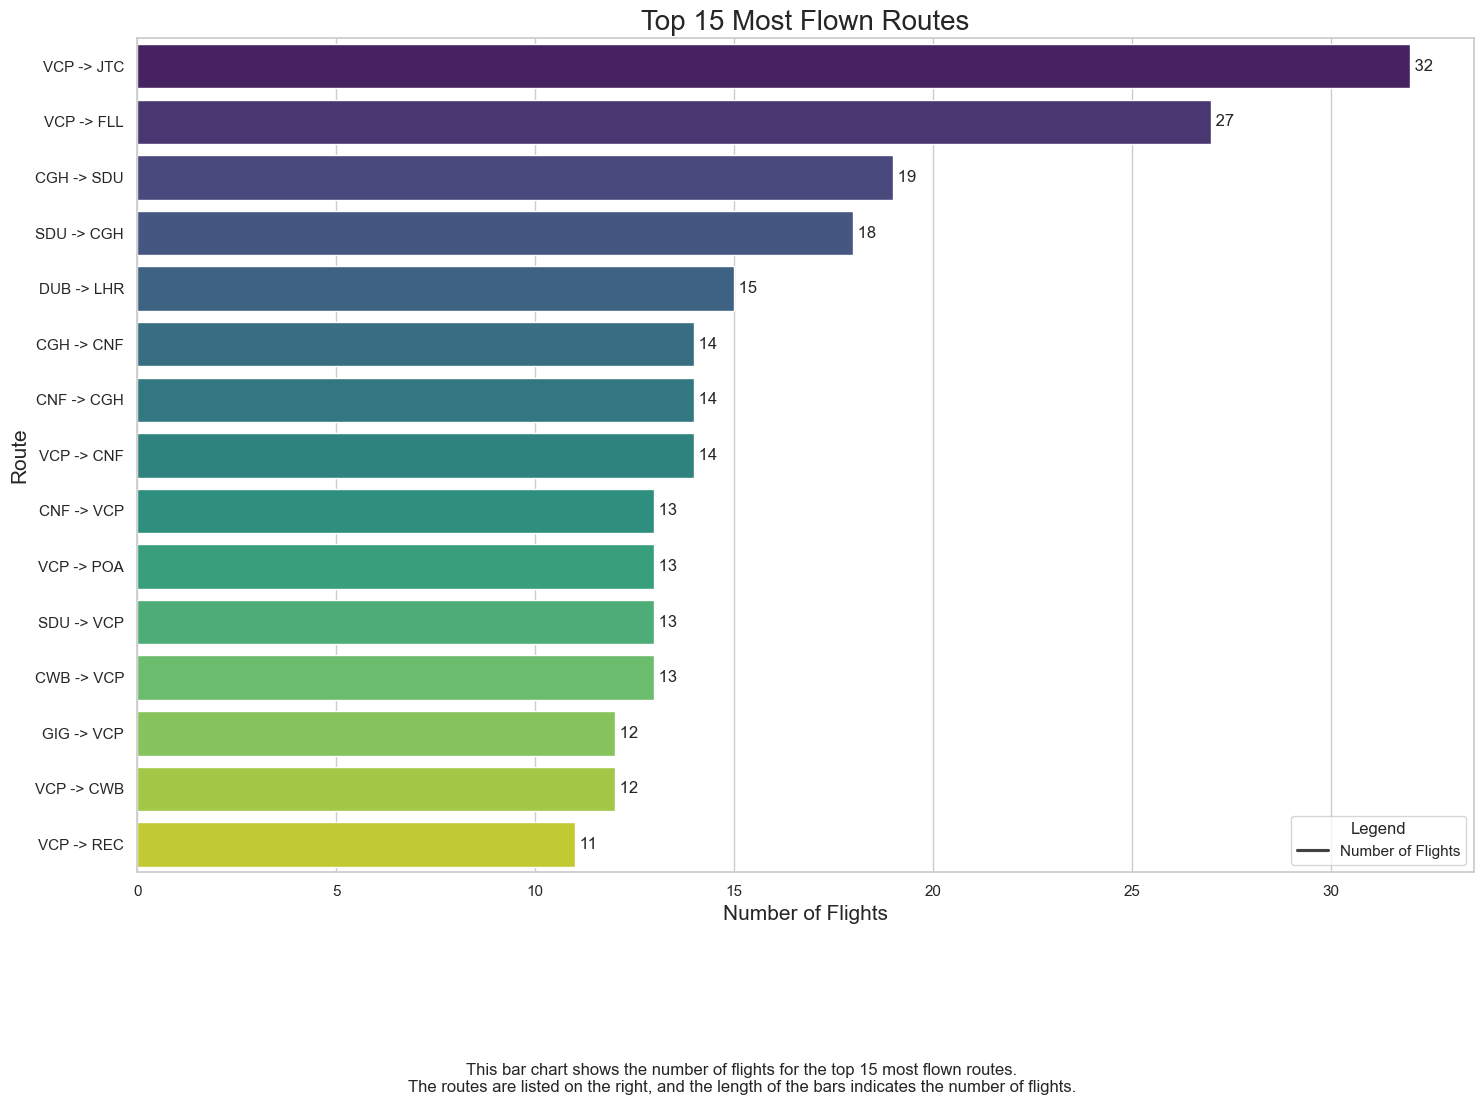

In [10]:
# create a new column for the route
data['route'] = data['departure_airport'] + ' -> ' + data['arrival_airport']

# drop duplicate flight numbers for each route
df_unique_flights = data.drop_duplicates(subset=['flight_number', 'route'])

# count the number of flights per route
route_counts = df_unique_flights['route'].value_counts().reset_index()
route_counts.columns = ['route', 'count']

# sort and select the top 15 routes
top_routes = route_counts.head(15)

# create the plot
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")
barplot = sns.barplot(x='count', y='route', data=top_routes, palette='viridis')

# add title and labels
plt.title('Top 15 Most Flown Routes', fontsize=20)
plt.xlabel('Number of Flights', fontsize=15)
plt.ylabel('Route', fontsize=15)

# add number of flights next to the bars
for index, value in enumerate(top_routes['count']):
    plt.text(value, index, f' {value}', va='center', fontsize=12)

# add description below the plot
plt.figtext(0.5, -0.1, 'This bar chart shows the number of flights for the top 15 most flown routes.\n'
                       'The routes are listed on the right, and the length of the bars indicates the number of flights.', 
            ha='center', fontsize=12)

# add legend
plt.legend(title='Legend', labels=['Number of Flights'])

# adjust layout to make space for the description
plt.tight_layout(rect=[0, 0.05, 1, 1])

# save the plot
plt.savefig('top15_most_flown_routes_bar_chart.pdf', format='pdf')
plt.show()


In [17]:
# total number of unique routes
total_routes = route_counts.shape[0]

print(f"Total number of unique routes: {total_routes}")

Total number of unique routes: 704


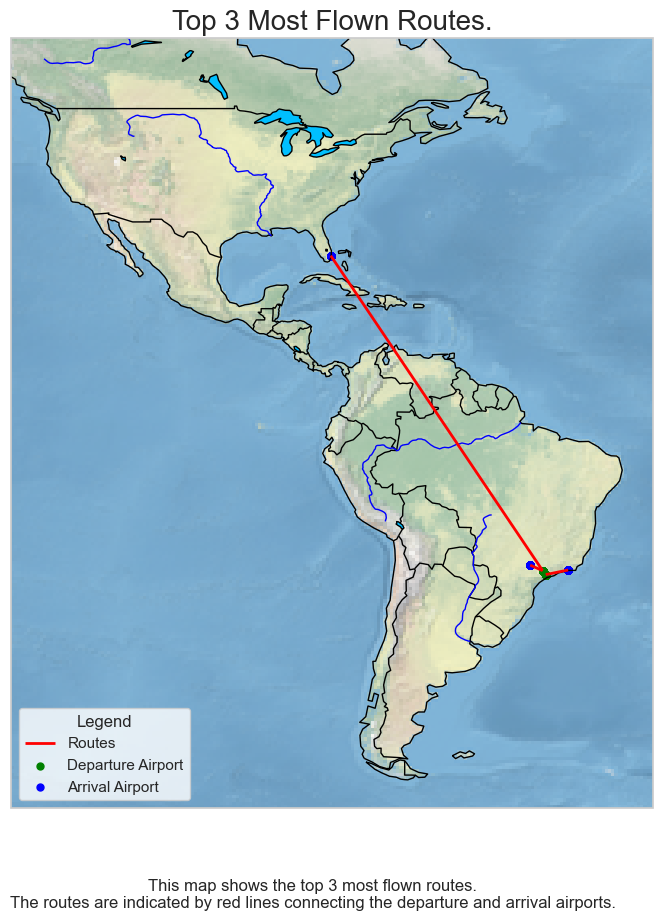

In [34]:
# sort and select the top 3 routes
top_routes = route_counts.head(3)

# merge top routes with original data to get coordinates
top_routes_data = df[df['route'].isin(top_routes['route'])]

# create GeoDataFrame for the routes
departure_gdf = gpd.GeoDataFrame(top_routes_data, geometry=gpd.points_from_xy(top_routes_data.departure_lon, top_routes_data.departure_lat))
arrival_gdf = gpd.GeoDataFrame(top_routes_data, geometry=gpd.points_from_xy(top_routes_data.arrival_lon, top_routes_data.arrival_lat))

# create LineString geometries for each route
route_lines = []
for route in top_routes['route']:
    route_data = top_routes_data[top_routes_data['route'] == route]
    departure_coords = route_data[['departure_lon', 'departure_lat']].values[0]
    arrival_coords = route_data[['arrival_lon', 'arrival_lat']].values[0]
    line = LineString([departure_coords, arrival_coords])
    route_lines.append({'route': route, 'geometry': line})

routes_lines_gdf = gpd.GeoDataFrame(route_lines)

# create the map
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()

# add water bodies and land masses
ax.stock_img()  # use standard background image
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='coral')
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='skyblue')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='deepskyblue')
ax.add_feature(cfeature.RIVERS, edgecolor='blue')

# plot the routes
routes_lines_gdf.plot(ax=ax, edgecolor='red', linewidth=2, label='Routes')

# plot departure and arrival points
departure_gdf.plot(ax=ax, color='green', markersize=25, label='Departure Airport')
arrival_gdf.plot(ax=ax, color='blue', markersize=25, label='Arrival Airport')

# set the map extent for the Americas
ax.set_extent([-130, -30, -60, 60], crs=ccrs.PlateCarree())

# add title and description
plt.title('Top 3 Most Flown Routes.', fontsize=20)
plt.figtext(0.5, 0.01, 'This map shows the top 3 most flown routes.\n'
                       'The routes are indicated by red lines connecting the departure and arrival airports.', 
            ha='center', fontsize=12)

# add legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='lower left', title='Legend')

plt.show()


In [35]:
top_routes

,route,count
0,VCP -> JTC,32
1,VCP -> FLL,27
2,CGH -> SDU,19
